<a href="https://colab.research.google.com/github/Karishma48/Regression-Modeling-with-PyCaret/blob/main/PycaretRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret[full]

In [ ]:
from pycaret.utils import version
version()

'3.3.2'

In [ ]:
from pycaret.datasets import get_data
all_datasets=get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,NaN,NaN,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,NaN,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,NaN,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,NaN,683,10,N
6,credit,Multivariate,Classification (Binary),default,NaN,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,NaN,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,NaN,10000,14,N
9,employee,Multivariate,Classification (Binary),left,NaN,14999,10,N


In [ ]:
dataset=get_data('bike')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [ ]:
dataset=dataset.sample(1000)

In [ ]:
data=dataset.sample(frac=0.9, random_state=123)
data_unseen= dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: '+str(data.shape))
print('Unseen Data for Predictions: '+str(data_unseen.shape))

Data for Modeling: (900, 15)
Unseen Data for Predictions: (100, 15)


In [ ]:
data.shape

(900, 15)

In [ ]:
data.nunique()

,0
instant,900
dteday,521
season,4
yr,2
mnth,12
hr,24
holiday,2
weekday,7
workingday,2
weathersit,3


In [ ]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [ ]:
categoricals = ['season','yr','mnth','hr', 'holiday', 'weekday','workingday', 'weathersit']
numericals = ['temp', 'atemp', 'hum', 'windspeed']
ignore = ['instant', 'dteday']

In [ ]:
from pycaret.regression import *

In [ ]:
# Experience1 = No Preprocessing
exp1 = RegressionExperiment()
exp1.setup(data, ignore_features=ignore, target='cnt', session_id=555, train_size=0.7,
           preprocess=False, categorical_features=categoricals, numeric_features=numericals)

,Description,Value
0,Session id,555
1,Target,cnt
2,Target type,Regression
3,Original data shape,"(900, 15)"
4,Transformed data shape,"(900, 13)"
5,Transformed train set shape,"(630, 13)"
6,Transformed test set shape,"(270, 13)"
7,Ignore features,2
8,Numeric features,4
9,Categorical features,8


In [ ]:
# Experience2 = With Preprocessing and more!!!
exp2 = RegressionExperiment()
exp2.setup(data, ignore_features=ignore, target='cnt', session_id=555, train_size=0.7,
            categorical_features=categoricals, numeric_features=numericals, numeric_imputation='mean', categorical_imputation='mode',
           preprocess=True, normalize=True, remove_outliers=True, ordinal_features=None)

,Description,Value
0,Session id,555
1,Target,cnt
2,Target type,Regression
3,Original data shape,"(900, 15)"
4,Transformed data shape,"(868, 58)"
5,Transformed train set shape,"(598, 58)"
6,Transformed test set shape,"(270, 58)"
7,Ignore features,2
8,Numeric features,4
9,Categorical features,8


In [ ]:
top3_exp1 = exp1.compare_models(n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,38.7879,3332.4842,57.3868,0.8895,0.5994,0.7781,1.0860
xgboost,Extreme Gradient Boosting,46.8529,4892.9530,69.6759,0.8380,0.5753,0.7312,0.1320
lightgbm,Light Gradient Boosting Machine,49.2962,5467.5828,73.5141,0.8234,0.6144,0.8374,1.0830
et,Extra Trees Regressor,54.2629,6024.6047,77.2029,0.8056,0.6889,1.0564,0.2400
gbr,Gradient Boosting Regressor,55.2891,6547.5961,80.6628,0.7877,0.7246,1.2022,0.1770
rf,Random Forest Regressor,55.9898,6846.3974,82.2890,0.7781,0.5870,0.7651,0.3180
knn,K Neighbors Regressor,67.1432,10051.4013,99.7838,0.6755,0.6784,0.9521,0.0240
dt,Decision Tree Regressor,71.7651,12105.7206,109.1634,0.6111,0.7107,0.8840,0.0160
ada,AdaBoost Regressor,90.1171,12335.5148,110.5624,0.6029,1.1482,3.1512,0.0980
lr,Linear Regression,110.0656,20990.7610,143.8443,0.3407,1.2748,3.9791,0.7090


Processing:   0%|          | 0/87 [00:00<?, ?it/s]

In [ ]:
top3_exp1

 XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=555, ...),
 LGBMRegressor(n_jobs=-1, random_state=555)]

In [ ]:
top3_exp2 = exp2.compare_models(n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,52.5354,5633.8694,74.5281,0.8194,0.8097,1.5185,1.2820
xgboost,Extreme Gradient Boosting,61.6337,8052.1231,89.0473,0.7463,0.8011,1.3631,0.3800
et,Extra Trees Regressor,62.9351,8175.9066,89.6101,0.7371,0.8440,1.7511,0.7950
gbr,Gradient Boosting Regressor,68.6346,9071.7406,94.7169,0.7090,0.8858,1.7414,0.6570
rf,Random Forest Regressor,74.9720,10466.0996,101.7736,0.6658,1.0176,2.5596,0.9640
lasso,Lasso Regression,77.2055,10653.1358,102.7379,0.6583,1.0344,2.7856,0.4620
llar,Lasso Least Angle Regression,77.2056,10653.1446,102.7378,0.6583,1.0344,2.7856,0.4220
br,Bayesian Ridge,77.5047,10735.4889,103.1238,0.6561,1.0351,2.7901,0.3300
knn,K Neighbors Regressor,70.8346,10781.1133,103.3579,0.6539,0.7900,1.3209,0.3440
ridge,Ridge Regression,77.8832,10810.8846,103.4047,0.6534,1.0419,2.8780,0.3620


Processing:   0%|          | 0/87 [00:00<?, ?it/s]

## Create Model

In [ ]:
xgboost = exp1.create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,49.1860,5499.6979,74.1599,0.8475,0.6218,1.0072
1,53.8650,5490.6570,74.0990,0.8098,0.4296,0.4021
2,44.6731,3796.3438,61.6145,0.8784,0.5680,0.8107
3,41.9272,5514.4862,74.2596,0.7022,0.4894,0.4292
4,50.3326,4318.1223,65.7124,0.8934,0.5285,0.5491
5,50.9907,5744.6070,75.7932,0.8310,0.5098,0.5527
6,39.2243,3454.5651,58.7755,0.8891,0.7023,1.0254
7,41.8704,4025.0780,63.4435,0.8577,0.6478,0.8778
8,45.9003,5585.9512,74.7392,0.8305,0.5099,0.4233


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

# Tune Model

In [ ]:
tune_xgboost = exp1.tune_model(xgboost)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,55.2619,5307.6671,72.8537,0.8529,0.9067,2.2604
1,46.2019,4782.7902,69.1577,0.8343,0.5050,0.3781
2,43.5880,4434.0407,66.5886,0.8580,0.6768,0.6935
3,37.8502,4143.8754,64.3729,0.7762,0.6297,0.5861
4,53.3419,4558.8964,67.5196,0.8875,0.5921,0.6726
5,54.4457,5841.8135,76.4318,0.8282,0.7083,0.7086
6,34.7902,2701.3126,51.9742,0.9133,0.6706,1.0542
7,46.6227,4997.2090,70.6909,0.8234,0.6981,1.0621
8,52.1389,5697.0420,75.4788,0.8272,0.7069,0.9735


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
xgboost

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cpu', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=555, ...)

In [ ]:
tune_xgboost

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device='cpu', early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.2, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=2, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=250,
             n_jobs=-1, num_parallel_tree=None, random_state=555, ...)

# Plot Model

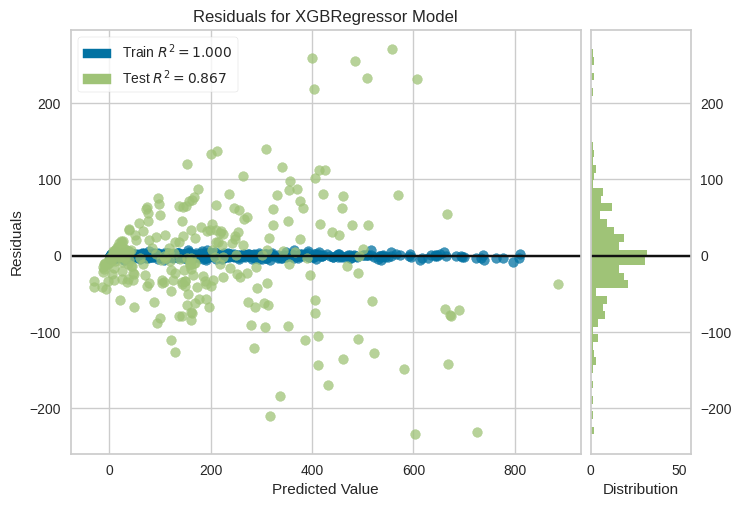

In [ ]:
exp1.plot_model(tune_xgboost)

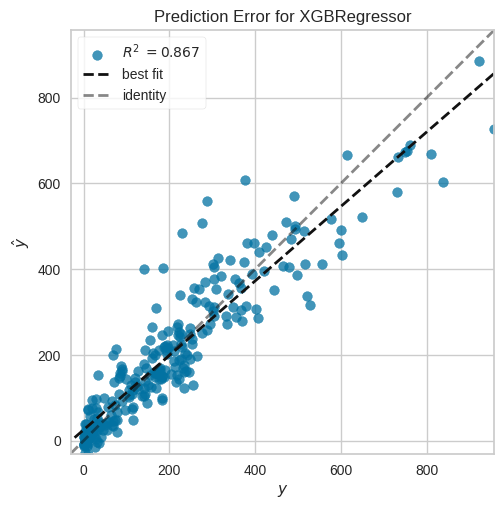

In [ ]:
exp1.plot_model(tune_xgboost, plot='error')

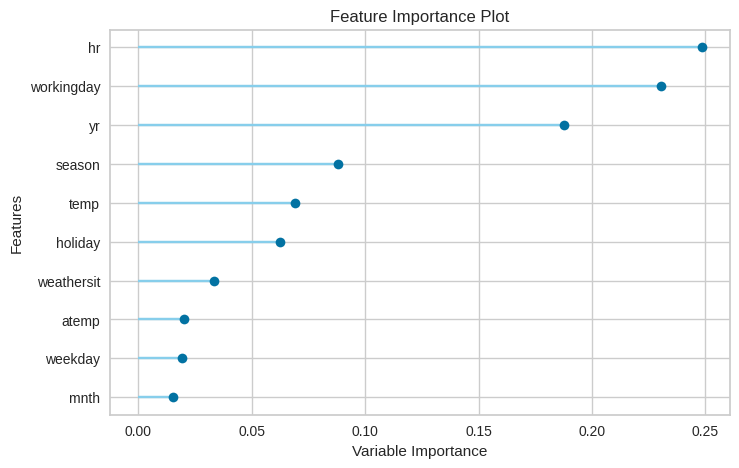

In [ ]:
exp1.plot_model(tune_xgboost, plot='feature')

In [ ]:
exp1.plot_model(tune_xgboost, plot='parameter')

,Parameters
objective,reg:squarederror
base_score,None
booster,gbtree
callbacks,None
colsample_bylevel,None
colsample_bynode,None
colsample_bytree,1
device,cpu
early_stopping_rounds,None
enable_categorical,False


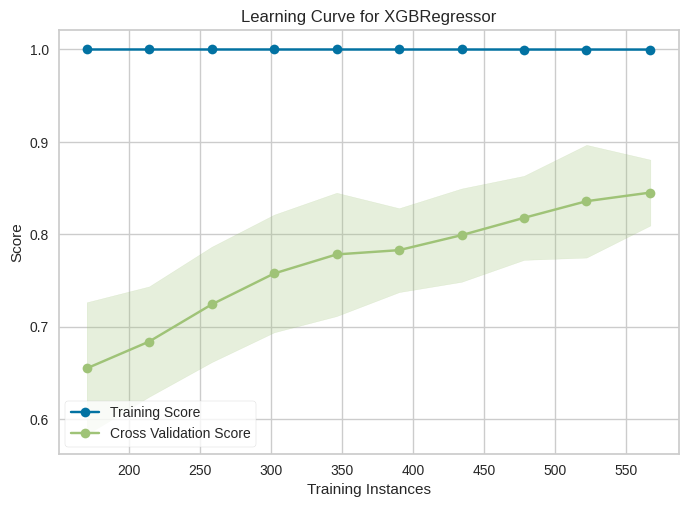

In [ ]:
exp1.plot_model(tune_xgboost, plot='learning')

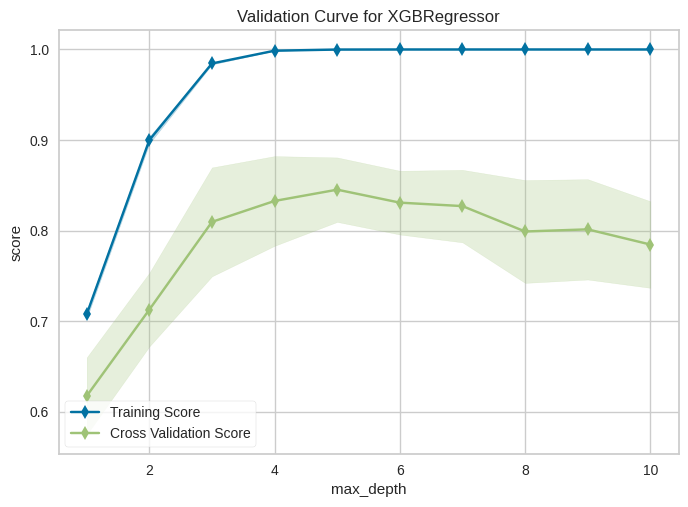

In [ ]:
exp1.plot_model(tune_xgboost, plot='vc')

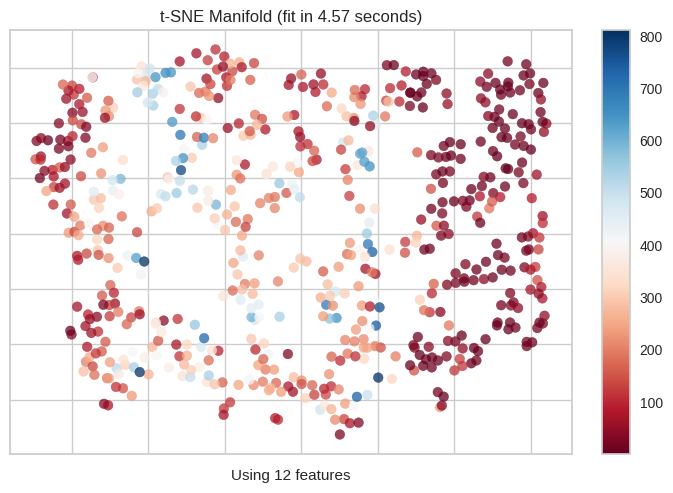

In [ ]:
exp1.plot_model(tune_xgboost, plot='manifold')

# Evaluate Model

In [ ]:
lr= exp1.create_model('lr', fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,108.8096,20353.1191,142.6644,0.3745,1.2222,4.4320
1,96.0500,16317.2966,127.7392,0.3469,1.2907,4.4223
2,127.6438,27639.7341,166.2520,0.2581,1.2028,2.8620
3,109.9749,18903.4386,137.4898,0.3639,1.3779,3.7718
4,104.6906,20798.2447,144.2160,0.3839,1.2687,4.2012
Mean,109.4338,20802.3666,143.6723,0.3455,1.2725,3.9379
Std,10.3336,3759.6068,12.6747,0.0454,0.0614,0.5888


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
exp1.evaluate_model(lr)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Interpret Model

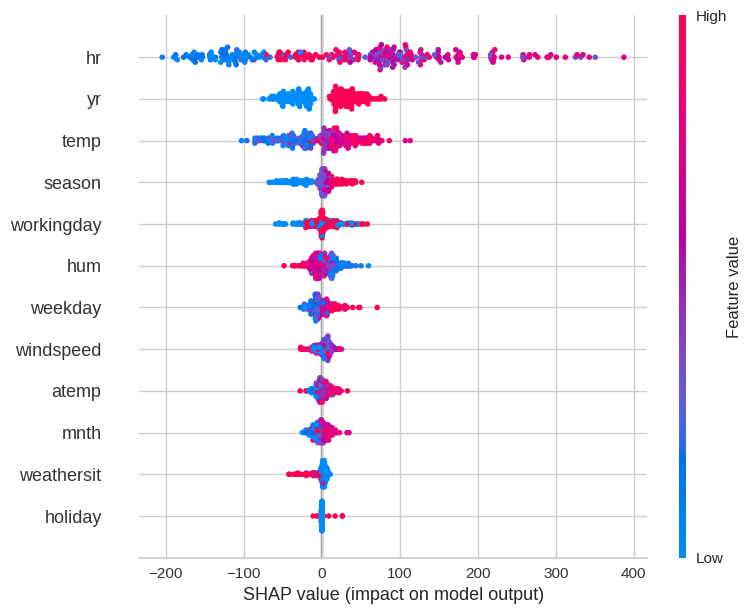

In [ ]:
exp1.interpret_model(tune_xgboost)

# Ensemble Model

In [ ]:
dt=exp1.create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,74.2381,10835.8571,104.0954,0.6996,0.7514,1.1104
1,86.3651,12779.1905,113.0451,0.5573,0.7742,1.5746
2,71.9048,13455.3651,115.9973,0.5690,0.6370,0.6174
3,60.2063,8920.3016,94.4473,0.5183,0.7299,0.6430
4,87.7619,17447.6984,132.0897,0.5693,0.6148,0.6388
5,85.8571,15895.8571,126.0788,0.5325,0.6557,0.5135
6,52.1429,7673.5714,87.5989,0.7536,0.8361,1.3768
7,72.4762,13506.0635,116.2156,0.5227,0.7208,0.8792
8,64.6032,11888.1587,109.0328,0.6393,0.7589,0.8061


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
bagged_dt=exp1.ensemble_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,65.7190,9797.9437,98.9846,0.7284,0.6819,1.1155
1,55.9508,5997.4510,77.4432,0.7923,0.4847,0.4831
2,63.7873,8677.9673,93.1556,0.7220,0.5533,0.6299
3,46.4270,5017.2427,70.8325,0.7291,0.4333,0.4705
4,73.4302,9801.9024,99.0046,0.7580,0.5972,0.6681
5,62.6190,8444.1730,91.8922,0.7517,0.4795,0.4748
6,44.2381,4870.4498,69.7886,0.8436,0.7621,1.2133
7,74.1238,11548.7362,107.4650,0.5918,0.7015,0.9512
8,58.4571,7604.7775,87.2054,0.7693,0.5025,0.5452


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
boosted_dt=exp1.ensemble_model(dt, method='Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,57.3333,7359.7460,85.7890,0.7960,0.6244,1.0065
1,72.4762,11406.4444,106.8010,0.6049,0.5477,0.4990
2,63.1746,9472.8254,97.3284,0.6966,0.5637,0.6175
3,42.4286,4235.1270,65.0779,0.7713,0.5002,0.5094
4,57.0794,6347.6508,79.6721,0.8433,0.5775,0.5811
5,71.3492,10601.3175,102.9627,0.6882,0.5918,0.5587
6,51.5397,7233.0952,85.0476,0.7678,0.7516,1.0141
7,63.2381,9213.3016,95.9859,0.6744,0.8010,1.0080
8,57.3333,8268.5079,90.9313,0.7491,0.4663,0.4669


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

# Blending and Stacking

In [ ]:
top3_exp1

 XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=555, ...),
 LGBMRegressor(n_jobs=-1, random_state=555)]

In [ ]:
blender = exp1.blend_models(estimator_list = top3_exp1)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,43.5692,4300.7908,65.5804,0.8808,0.6111,0.8016
1,45.7252,4075.7699,63.8418,0.8588,0.3951,0.3830
2,39.6288,3253.5966,57.0403,0.8958,0.5628,0.7492
3,39.2439,4091.6074,63.9657,0.7791,0.5523,0.6210
4,45.3281,3686.1977,60.7141,0.9090,0.5073,0.4813
5,43.9994,4719.6353,68.6996,0.8612,0.4398,0.4341
6,33.3989,2482.3251,49.8229,0.9203,0.6339,0.8803
7,41.4006,3866.8375,62.1839,0.8633,0.6115,0.7868
8,44.2543,5067.5849,71.1870,0.8462,0.4999,0.4930


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
blender

VotingRegressor(estimators=[('CatBoost Regressor',
                             <catboost.core.CatBoostRegressor object at 0x7df1a26d6610>),
                            ('Extreme Gradient Boosting',
                             XGBRegressor(base_score=None, booster='gbtree',
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device='cpu',
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature...
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=-1,
                                          num_parallel_tree=None,
                                          random_state=555, ...)),
                            ('Light Gradient Boosting Machine',
                             LGBMRegressor(n_jobs=-1, random_state=555))],
                n_jobs=-1)

In [ ]:
staker = exp1.stack_models(estimator_list = top3_exp1)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,38.9468,3161.2182,56.2247,0.9124,0.5892,0.7908
1,33.8186,2297.4673,47.9319,0.9204,0.4265,0.4640
2,37.9620,2819.7418,53.1012,0.9097,0.8590,1.3337
3,41.0486,4485.9874,66.9775,0.7578,0.6704,0.6669
4,38.0832,2315.5087,48.1197,0.9428,0.6382,0.5982
5,43.8112,3722.8557,61.0152,0.8905,0.6162,0.5128
6,32.0938,2313.1542,48.0953,0.9257,0.7878,1.1228
7,40.6071,3265.3696,57.1434,0.8846,0.7542,0.8797
8,41.1691,4128.5035,64.2534,0.8747,0.5528,0.6420


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
staker

StackingRegressor(cv=5,
                  estimators=[('CatBoost Regressor',
                               <catboost.core.CatBoostRegressor object at 0x7df1a1323f50>),
                              ('Extreme Gradient Boosting',
                               XGBRegressor(base_score=None, booster='gbtree',
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device='cpu',
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,...
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=-1,
                                            num_parallel_tree=None,
                                            random_state=555, ...)),
                              ('Light Gradient Boosting Machine',
                               LGBMRegressor(n_jobs=-1, random_state=555))],
                  final_estimator=LinearRegression(n_jobs=-1), n_jobs=-1)

In [ ]:
xgboost = exp1.create_model('xgboost')
stacker_xgboost = exp1.stack_models(top3_exp1, meta_model = xgboost)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,49.1860,5499.6979,74.1599,0.8475,0.6218,1.0072
1,53.8650,5490.6570,74.0990,0.8098,0.4296,0.4021
2,44.6731,3796.3438,61.6145,0.8784,0.5680,0.8107
3,41.9272,5514.4862,74.2596,0.7022,0.4894,0.4292
4,50.3326,4318.1223,65.7124,0.8934,0.5285,0.5491
5,50.9907,5744.6070,75.7932,0.8310,0.5098,0.5527
6,39.2243,3454.5651,58.7755,0.8891,0.7023,1.0254
7,41.8704,4025.0780,63.4435,0.8577,0.6478,0.8778
8,45.9003,5585.9512,74.7392,0.8305,0.5099,0.4233


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,41.9196,3473.5494,58.9368,0.9037,0.5750,0.7152
1,44.6225,4008.0116,63.3089,0.8612,0.4478,0.3885
2,41.3029,3652.7970,60.4384,0.8830,0.6524,0.6697
3,44.4617,6061.6762,77.8568,0.6727,0.4203,0.3806
4,35.1757,2815.5732,53.0620,0.9305,0.4088,0.3517
5,54.4496,7260.2126,85.2069,0.7865,0.5321,0.4244
6,32.1643,2976.1854,54.5544,0.9044,0.5561,0.5315
7,46.2863,4195.9396,64.7761,0.8517,0.6499,0.7827
8,43.1532,4399.0092,66.3250,0.8665,0.5086,0.4002


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
stacker_xgboost

StackingRegressor(cv=5,
                  estimators=[('CatBoost Regressor',
                               <catboost.core.CatBoostRegressor object at 0x7df1a1380fd0>),
                              ('Extreme Gradient Boosting',
                               XGBRegressor(base_score=None, booster='gbtree',
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device='cpu',
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,...
                                               grow_policy=None,
                                               importance_type=None,
                                               interaction_constraints=None,
                                               learning_rate=None, max_bin=None,
                                               max_cat_threshold=None,
                                               max_cat_to_onehot=None,
                                               max_delta_step=None,
                                               max_depth=None, max_leaves=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               multi_strategy=None,
                                               n_estimators=None, n_jobs=-1,
                                               num_parallel_tree=None,
                                               random_state=555, ...),
                  n_jobs=-1)

In [ ]:
tuned_top3_expr = [exp1.tune_model(i) for i in top3_exp1]
best_R2_model = exp1.automl(optimize = 'R2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,39.7996,3203.6535,56.6008,0.9112,0.6434,1.1951
1,40.4476,3153.5513,56.1565,0.8908,0.4369,0.4167
2,40.0559,3071.8559,55.4243,0.9016,0.5963,1.0361
3,39.3791,3603.2219,60.0268,0.8054,0.6442,0.7622
4,41.6910,3016.2609,54.9205,0.9255,0.5251,0.4821
5,45.6386,4402.8507,66.3540,0.8705,0.5216,0.5926
6,33.9622,2413.5510,49.1279,0.9225,0.7263,1.1470
7,44.3350,3927.6750,62.6712,0.8612,0.7782,1.1241
8,44.8188,4773.3741,69.0896,0.8552,0.7437,0.7049


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,55.2619,5307.6671,72.8537,0.8529,0.9067,2.2604
1,46.2019,4782.7902,69.1577,0.8343,0.5050,0.3781
2,43.5880,4434.0407,66.5886,0.8580,0.6768,0.6935
3,37.8502,4143.8754,64.3729,0.7762,0.6297,0.5861
4,53.3419,4558.8964,67.5196,0.8875,0.5921,0.6726
5,54.4457,5841.8135,76.4318,0.8282,0.7083,0.7086
6,34.7902,2701.3126,51.9742,0.9133,0.6706,1.0542
7,46.6227,4997.2090,70.6909,0.8234,0.6981,1.0621
8,52.1389,5697.0420,75.4788,0.8272,0.7069,0.9735


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,58.8512,7224.6171,84.9977,0.7997,0.9070,1.8597
1,68.2750,7432.0239,86.2092,0.7426,0.7050,0.6800
2,58.8967,7198.3025,84.8428,0.7694,0.7479,1.2589
3,49.6037,4654.7841,68.2260,0.7487,0.9581,1.8919
4,61.1851,7168.3430,84.6661,0.8231,0.6012,0.7132
5,61.1648,6474.8993,80.4668,0.8096,0.6259,0.7731
6,56.8392,6077.5667,77.9588,0.8049,1.0350,1.9971
7,58.8699,7109.0817,84.3154,0.7487,0.9864,1.7904
8,64.2693,10943.2222,104.6099,0.6680,0.6740,0.8213


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
best_R2_model

StackingRegressor(cv=5,
                  estimators=[('CatBoost Regressor',
                               <catboost.core.CatBoostRegressor object at 0x7df1a1343150>),
                              ('Extreme Gradient Boosting',
                               XGBRegressor(base_score=None, booster='gbtree',
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device='cpu',
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,...
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=-1,
                                            num_parallel_tree=None,
                                            random_state=555, ...)),
                              ('Light Gradient Boosting Machine',
                               LGBMRegressor(n_jobs=-1, random_state=555))],
                  final_estimator=LinearRegression(n_jobs=-1), n_jobs=-1)

# Predict Model

In [ ]:
holdout_pred = exp1.predict_model(staker)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,39.2829,3722.1089,61.0091,0.8960,0.5973,0.6655


# Finalize Model

In [ ]:
final_stacker = exp1.finalize_model(staker)

In [ ]:
final_stacker

Pipeline(memory=Memory(location=None),
         steps=[('placeholder', None),
                ('actual_estimator',
                 StackingRegressor(cv=5,
                                   estimators=[('CatBoost Regressor',
                                                <catboost.core.CatBoostRegressor object at 0x7df1a13c2410>),
                                               ('Extreme Gradient Boosting',
                                                XGBRegressor(base_score=None,
                                                             booster='gbtree',
                                                             callbacks=None,
                                                             colsample_bylevel=None,
                                                             colsample_bynode=None,
                                                             colsample_bytree=N...
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=None,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=None,
                                                             n_jobs=-1,
                                                             num_parallel_tree=None,
                                                             random_state=555, ...)),
                                               ('Light Gradient Boosting '
                                                'Machine',
                                                LGBMRegressor(n_jobs=-1,
                                                              random_state=555))],
                                   final_estimator=LinearRegression(n_jobs=-1),
                                   n_jobs=-1))])

# Final Prediction on Unseen Data

In [ ]:
unseen_predictions = exp1.predict_model(final_stacker, data=data_unseen)
unseen_predictions.tail()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,34.7119,2846.5718,53.3533,0.9245,0.4556,0.5227


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,prediction_label
95,13483,7/20/2012,3,1,7,23,0,5,1,2,0.62,0.5758,0.83,0.2836,166,151.161229
96,17160,12/22/2012,1,1,12,18,0,6,0,1,0.26,0.2121,0.44,0.4627,82,144.291375
97,13623,7/26/2012,3,1,7,19,0,4,1,1,0.90,0.8636,0.45,0.3284,614,546.104496
98,13655,7/28/2012,3,1,7,3,0,6,0,1,0.72,0.6818,0.70,0.0000,43,31.034837
99,8082,12/8/2011,4,0,12,9,0,4,1,1,0.24,0.2121,0.52,0.3881,225,195.898982


Save Model

In [ ]:
exp1.save_model(final_stacker, 'my_pycaret_regression')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('placeholder', None),
                 ('actual_estimator',
                  StackingRegressor(cv=5,
                                    estimators=[('CatBoost Regressor',
                                                 <catboost.core.CatBoostRegressor object at 0x7df1a13c2410>),
                                                ('Extreme Gradient Boosting',
                                                 XGBRegressor(base_score=None,
                                                              booster='gbtree',
                                                              callbacks=None,
                                                              colsample_bylevel=None,
                                                              colsample_bynode=None,
                                                              colsample_bytree=N...
                                                              max_cat_to_onehot=None,
   